In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.count().head()

id                569
diagnosis         569
radius_mean       569
texture_mean      569
perimeter_mean    569
dtype: int64

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
!pip install sklearn

In [7]:
df=df.drop("Unnamed: 32",axis=1)
#on drop la colonne "Unnamed: 32" vu qu'on ne sait pas a quoi elle sert

In [8]:
df_features = df.drop("id", axis=1).drop("diagnosis", axis=1)
# les df_features seront les colonne qui nous servirons a faire des cluster 
# on drop la colonne id parce qu'elle n'est pas utilie ici et la colonne diagnosis sert a savoir si nous avons bien classifié les features

In [9]:
df_features.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df_labels = df['diagnosis']
# les df_labels nous permmettent de savoir qui a un cas de cancer bénigne ou maligne

In [11]:
# on va commencer par utiliser l'agorithme kmeans
tab_score = {} # on stockera les scores obtenus dans un dictionaire

df_labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
# on voit ici que les donnée ne sont pas formatée correctement


In [13]:
# on utilise LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labels = le.fit_transform(df['diagnosis'])
#donc maintenant les cas de cancer malin sont representé par un 1 et les cas de cancer bénin sont représenté par un 0
# M = 1, B = 0

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, 
                                                    df_labels, test_size=0.4,
                                                    random_state=64)
#on sépare nos donnée pour faire des test pour les algorithme de cluster
# et on fait un group pour entrainer les algo et un groupe pour vérifier que leurs resultat sont bon

In [15]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,22.25,21.40,152.40,1461.0,0.1545,0.3949,0.38530,0.25500,0.4066,0.10590
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.54090,0.18130,0.4863,0.08633
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,0.2132,0.06022,...,22.93,27.68,152.20,1603.0,0.1398,0.2089,0.31570,0.16420,0.3695,0.08579
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,18.10,31.69,117.70,1030.0,0.1389,0.2057,0.27120,0.15300,0.2675,0.07873
166,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.1436,0.1257,0.10470,0.04603,0.2090,0.07699
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.22490,0.11850,0.4882,0.06111


In [16]:
y_train

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [17]:
!pip install seaborn

In [18]:
import seaborn as sns 
%matplotlib inline

matrice_corr = df.corr().round(1)
# ici la matrice est trop grande pour nous permettre de visualiser les corrélation

<AxesSubplot:>

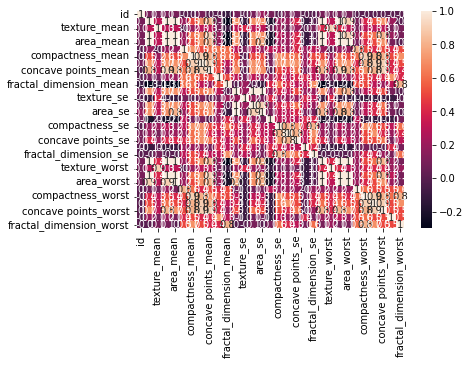

In [19]:
sns.heatmap(data=matrice_corr, annot=True)

<AxesSubplot:>

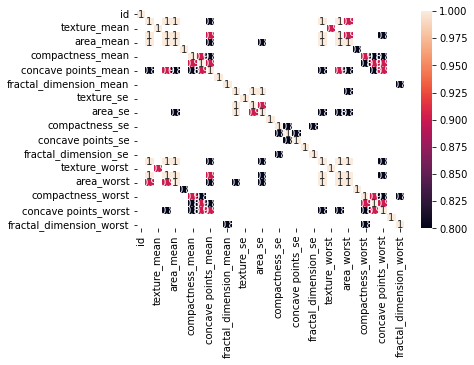

In [20]:
sns.heatmap(data=matrice_corr.where(matrice_corr > 0.7),annot=True)
#on peut faciliter la lecture en ne regardant que ce qui est fortement corrélé

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=18)
km.fit(df_features)
# on lance l'agorithme de kmeans

KMeans(n_clusters=2, random_state=18)

In [22]:
km.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

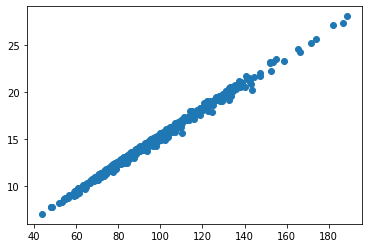

In [23]:
from matplotlib import pyplot as plt
plt.scatter(df_features.perimeter_mean, df_features.radius_mean)

In [24]:
colormap=np.array(['Red','green','blue'])

Text(0.5, 1.0, 'Clustering réel')

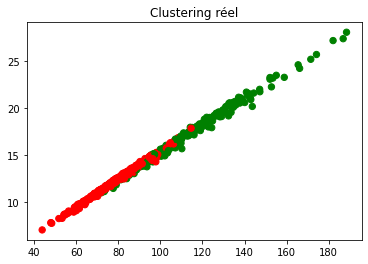

In [25]:
plt.scatter(df_features.perimeter_mean, df_features.radius_mean,
            c=colormap[df_labels],s=40)
plt.title('Clustering réel')

Text(0.5, 1.0, 'Clustering prédit par kMean')

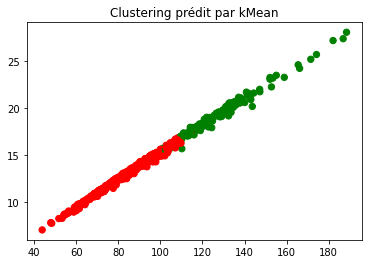

In [26]:
plt.scatter(df_features.perimeter_mean, df_features.radius_mean,
            c=colormap[km.labels_],s=40)
plt.title('Clustering prédit par kMean')

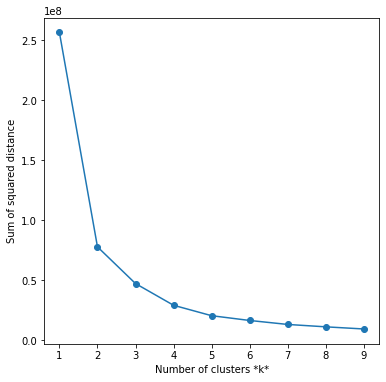

In [27]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_features)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    #for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.6972646156059465)
For n_clusters = 3, silhouette score is 0.672866397865778)
For n_clusters = 4, silhouette score is 0.5334614737117133)
For n_clusters = 5, silhouette score is 0.5127536688145046)


In [29]:
from sklearn.neighbors import KNeighborsClassifier # le classifieur

In [30]:

# Definir l'algorithme que je veux utiliser (KNN) avec le paramètre k=3
mon_knn = KNeighborsClassifier(n_neighbors=2)

#fitting : Lancer l'apprentissage ( données,labels)
mon_knn.fit(X_train, y_train)#.values.ravel())
# Evaluer l'entrainement de mon modèle
train_score = mon_knn.score(X_train, y_train)
print('train score = ',train_score )


train score =  0.9384164222873901


In [31]:

tab_score['Knn_train_score'] = train_score

In [32]:
print('---- L Ensemble de test ----- \n',X_test)
#ypred : contient les prédictions de l'ensemble de test
knn_ypred = mon_knn.predict(X_test)
print('---- Les classes prédites par mon Algo ----- \n',knn_ypred)
print('---- Les classes réelles ----- \n',y_test)

---- L Ensemble de test ----- 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
440       10.970         17.20           71.73      371.5          0.08915   
341        9.606         16.84           61.64      280.5          0.08481   
350       11.660         17.07           73.70      421.0          0.07561   
308       13.500         12.71           85.69      566.2          0.07376   
144       10.750         14.97           68.26      355.3          0.07793   
..           ...           ...             ...        ...              ...   
414       15.130         29.81           96.71      719.5          0.08320   
65        14.780         23.94           97.40      668.3          0.11720   
14        13.730         22.61           93.60      578.3          0.11310   
198       19.180         22.49          127.50     1148.0          0.08523   
79        12.860         18.00           83.19      506.3          0.09934   

     compactness_mean  concavit

In [34]:
from sklearn.metrics import accuracy_score # Evaluation
print ('KNN accuracy score')
print (accuracy_score(y_test, knn_ypred))


KNN accuracy score
0.9254385964912281


In [40]:
tab_score['acc_score_knn'] = (accuracy_score(y_test, knn_ypred))

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mon_knn, X_train, y_train, cv=5)
#scores = cross_val_score(mon_knn, df_features, df_labels, cv=5)
scores

array([0.86956522, 0.94117647, 0.95588235, 0.86764706, 0.94117647])

In [42]:
print("par validation croisée:  " , scores.mean())

par validation croisée:   0.9150895140664963


In [43]:
#importer l'algorithme tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

#fitting : Lancer l'apprentissage ( données,labels)
clf.fit(X_train, y_train)

# Evaluer l'entrainement de mon modèle
train_score = clf.score(X_train, y_train)
print('train score = ',train_score )

train score =  0.9706744868035191


In [44]:
ypred = clf.predict(X_test)

print ('Decision tree accuracy score')
print (accuracy_score(y_test, ypred))

Decision tree accuracy score
0.9166666666666666


In [45]:
tab_score['acc_score_tree'] = accuracy_score(y_test, ypred)

[Text(167.4, 190.26, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(83.7, 135.9, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]'),
 Text(41.85, 81.53999999999999, 'X[28] <= 0.157\ngini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.024\nsamples = 332\nvalue = [328, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[21] <= 25.67\ngini = 0.476\nsamples = 46\nvalue = [18, 28]'),
 Text(104.625, 27.180000000000007, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(146.475, 27.180000000000007, 'gini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 16.11\ngini = 0.109\nsamples = 190\nvalue = [11, 179]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 0.066\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [9,

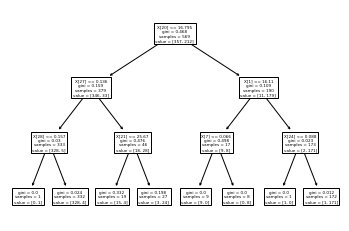

In [46]:
tree.plot_tree(clf.fit(df_features, df_labels),max_depth=5)

In [47]:
from sklearn.tree import export_text
algo_tree = tree.DecisionTreeClassifier(max_depth=3)
algo_tree = algo_tree.fit(X_train, y_train)
r = export_text(clf , feature_names = df_features.columns.array)
print(r)

|--- radius_worst <= 16.80
|   |--- concave points_worst <= 0.14
|   |   |--- symmetry_worst <= 0.16
|   |   |   |--- class: 1
|   |   |--- symmetry_worst >  0.16
|   |   |   |--- class: 0
|   |--- concave points_worst >  0.14
|   |   |--- texture_worst <= 25.67
|   |   |   |--- class: 0
|   |   |--- texture_worst >  25.67
|   |   |   |--- class: 1
|--- radius_worst >  16.80
|   |--- texture_mean <= 16.11
|   |   |--- concave points_mean <= 0.07
|   |   |   |--- class: 0
|   |   |--- concave points_mean >  0.07
|   |   |   |--- class: 1
|   |--- texture_mean >  16.11
|   |   |--- smoothness_worst <= 0.09
|   |   |   |--- class: 0
|   |   |--- smoothness_worst >  0.09
|   |   |   |--- class: 1



In [48]:
ypred = clf.predict(X_test)


print ('Tree accuracy score')

print (accuracy_score(y_test, ypred))

Tree accuracy score
0.9649122807017544


In [49]:
tab_score['acc_tree_score'] = accuracy_score(y_test, ypred)

In [50]:
tab_score

{'Knn_train_score': 0.9384164222873901,
 'acc_score_knn': 0.9254385964912281,
 'acc_score_tree': 0.9166666666666666,
 'acc_tree_score': 0.9649122807017544}